# Descriptive and Predictive Analytics Final Project

## 1. Initialization & Data Ingestion



### 1.1 Libraries and Configuration

In [2]:
# ---------------------------------------------
# CORE
# ---------------------------------------------
import warnings
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

# ---------------------------------------------
# VISUALIZATION
# ---------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# ---------------------------------------------
# MACHINE LEARNING MODELS
# ---------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# ---------------------------------------------
# HYPERPARAMETER SEARCH
# ---------------------------------------------
from sklearn.model_selection import RandomizedSearchCV, PredefinedSplit
from scipy.stats import randint, loguniform

# ---------------------------------------------
# FEATURE SELECTION
# ---------------------------------------------
from sklearn.feature_selection import SelectKBest, f_classif

# ---------------------------------------------
# PREPROCESSING
# ---------------------------------------------
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------
# METRICS
# ---------------------------------------------
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    classification_report,
    confusion_matrix
)

# ---------------------------------------------
# SETTINGS
# ---------------------------------------------
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

print("Libraries imported successfully!")


Libraries imported successfully!


### 1.2 Load Datasets

In [3]:
# read campaign
campaign = pd.read_csv("../data/campaigns.csv", sep=";", encoding="utf8")

# read donors
donor = pd.read_csv("../data/donors.csv", sep=",", encoding="utf8")

# read gifts
gift = pd.read_csv("../data/gifts.csv", sep=",", encoding="utf8")

# read selection campaigns 6169
selection6196 = pd.read_csv("../data/selection campaign 6169.csv", sep=";", encoding="utf8")

# read selection campaigns 7244
selection7244 =pd.read_csv("../data/selection campaign 7244.csv", sep=";", encoding="utf8")

# read selection campaign 
selection7362 = pd.read_csv("../data/selection campaign 7362.csv", sep=";", encoding="utf8")

### 1.3 Data Inspection

#### Campaign

In [4]:
campaign

,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"
...,...,...,...,...
362,7494,17/10/2019,8 539,"0,14 €"
363,7503,29/10/2019,6 126,"0,15 €"
364,7505,16/11/2019,29 746,"0,12 €"
365,7519,26/11/2019,35 199,"0,36 €"


In [5]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   campaignID   367 non-null    int64 
 1   date         367 non-null    object
 2   lettersSent  367 non-null    object
 3   CostUnit     367 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.6+ KB


#### Donor 

In [6]:
donor

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,D100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,D100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,D100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,D100005,1020.0,Brussels,Brussels,F,FR,06/25/1986
...,...,...,...,...,...,...,...
44686,D144687,4900.0,Liege,Wallonia,M,FR,09/12/1970
44687,D144688,3600.0,Limburg,Flanders,M,NL,11/28/1972
44688,D144689,3061.0,Flemish Brabant,Flanders,M,NL,04/21/1967
44689,D144690,1950.0,Flemish Brabant,Flanders,M,FR,05/07/1976


In [7]:
donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      44691 non-null  object 
 1   zipcode      44689 non-null  float64
 2   province     44691 non-null  object 
 3   region       44691 non-null  object 
 4   gender       44659 non-null  object 
 5   language     44691 non-null  object 
 6   dateOfBirth  44691 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.4+ MB


#### Gift

In [8]:
gift

,donorID,campaignID,amount,date
0,D100001,NaN,"12,39",23/03/2004
1,D100001,1577.0,"12,39",11/10/2007
2,D100001,1634.0,"6,69",28/12/2007
3,D100001,1778.0,"24,79",14/06/2008
4,D100001,1808.0,"7,44",09/07/2008
...,...,...,...,...
216589,D265584,6169.0,"300,0",23/09/2018
216590,D281770,6169.0,"30,0",08/09/2018
216591,D317880,6169.0,"157,5",12/09/2018
216592,D480980,6169.0,"36,0",12/09/2018


In [9]:
gift.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   donorID     216594 non-null  object 
 1   campaignID  200957 non-null  float64
 2   amount      216594 non-null  object 
 3   date        216594 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.6+ MB


#### Campaign 6169

In [10]:
selection6196

,donorID
0,D100001
1,D100002
2,D100004
3,D100008
4,D100009
...,...
34883,D144686
34884,D144687
34885,D144689
34886,D144690


In [11]:
selection6196.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34888 entries, 0 to 34887
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   donorID  34888 non-null  object
dtypes: object(1)
memory usage: 272.7+ KB


#### Campaign 7244

In [12]:
selection7244

,donorID
0,D100001
1,D100002
2,D100008
3,D100009
4,D100010
...,...
25640,D144682
25641,D144683
25642,D144686
25643,D144690


In [13]:
selection7244.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25645 entries, 0 to 25644
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   donorID  25645 non-null  object
dtypes: object(1)
memory usage: 200.5+ KB


## 2. Data Preprocessing


### 2.1 Clean Donors

In [14]:
donor_mod = donor.copy()

In [15]:
donor_mod

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,D100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,D100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,D100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,D100005,1020.0,Brussels,Brussels,F,FR,06/25/1986
...,...,...,...,...,...,...,...
44686,D144687,4900.0,Liege,Wallonia,M,FR,09/12/1970
44687,D144688,3600.0,Limburg,Flanders,M,NL,11/28/1972
44688,D144689,3061.0,Flemish Brabant,Flanders,M,NL,04/21/1967
44689,D144690,1950.0,Flemish Brabant,Flanders,M,FR,05/07/1976


In [16]:
# zip code

# impute missing values
donor_mod['zipcode'] = donor_mod['zipcode'].fillna(donor_mod['zipcode'].mode().iloc[0])

# convert to int
donor_mod['zipcode'] = donor_mod["zipcode"].astype(int)

# convert to object
donor_mod['zipcode'] = donor_mod['zipcode'].astype(str)

# birth_date

# convert to date time
donor_mod['dateOfBirth'] = pd.to_datetime(donor_mod['dateOfBirth'], format='%m/%d/%Y').dt.date

# gender

# create column for missing gender
donor_mod['IsgenderMissing'] = donor_mod['gender'].isnull().astype(int)


# get missing indices
missing_idx = donor_mod[donor_mod['gender'].isna()].index.to_numpy()

# --- FIX: Set seed for reproducibility ---
np.random.seed(42) 
# -----------------------------------------
# shuffle
np.random.shuffle(missing_idx)

# split
half = len(missing_idx) // 2
male_idx = missing_idx[:half]
female_idx = missing_idx[half:]

# assign
donor_mod.loc[male_idx, 'gender'] = 'M'
donor_mod.loc[female_idx, 'gender'] = 'F'


### 2.2 Clean Campaigns

In [17]:
campaign_mod = campaign.copy()

In [18]:
# campaign ID

# convert to object
campaign_mod['campaignID'] = campaign_mod['campaignID'].astype(str)

# date

# convert to date time
campaign_mod['date'] = pd.to_datetime(campaign_mod['date'], format='%d/%m/%Y')

# lettersent

# remove all non digits
campaign_mod['lettersSent'] = campaign_mod['lettersSent'].replace(r'\D', '', regex=True) 

# convert to int
campaign_mod['lettersSent'] = campaign_mod['lettersSent'].astype(int)

# cost unit

# # remove all non digits
campaign_mod['CostUnit'] = campaign_mod['CostUnit'].str.replace(',', '.', regex=False) 
campaign_mod['CostUnit'] = campaign_mod['CostUnit'].str.replace('€', '', regex=False)

# convert to float
campaign_mod['CostUnit'] = campaign_mod["CostUnit"].astype(float)



# rename column
campaign_mod.rename(columns={"CostUnit": "costUnit"}, inplace=True)
campaign_mod.rename(columns={"date":"campaignDate"}, inplace=True)


In [19]:
campaign_mod

,campaignID,campaignDate,lettersSent,costUnit
0,153,2004-12-13,6873,0.17
1,154,2005-01-01,7656,0.30
2,180,2005-01-18,9933,0.20
3,433,2005-01-29,7448,0.59
4,476,2005-02-12,6605,0.51
...,...,...,...,...
362,7494,2019-10-17,8539,0.14
363,7503,2019-10-29,6126,0.15
364,7505,2019-11-16,29746,0.12
365,7519,2019-11-26,35199,0.36


### 2.3 Clean Gifts

In [20]:
gift_mod = gift.copy()

In [21]:
# campaign ID 

# remove "." and convert to object
gift_mod['campaignID'] = gift_mod['campaignID'].astype(str).str.replace('\.0$', '', regex=True)

# replace "nan" with missing value
gift_mod['campaignID'].replace('nan', np.nan, inplace=True) 
    
# adjust missing values 
gift_mod['campaignID'] = gift_mod['campaignID'].fillna("-1")

# amount

# convert comma to decimal
gift_mod["amount"] = gift_mod['amount'].str.replace(",", ".", n=1)
gift_mod['amount'] = gift_mod['amount'].str.replace(",","")

# convert to float
gift_mod["amount"] = gift_mod['amount'].astype(float).round(2)

# winsorize 
# calculate 99 percentile
upper_limit_99 = gift_mod['amount'].quantile(0.99)


# replace extreme values with the 99 percentile
gift_mod['amount'] = np.where(gift_mod['amount'] > upper_limit_99,2 * upper_limit_99,gift_mod['amount'])


# adjust date type
gift_mod['date'] = pd.to_datetime(gift_mod['date'], format="%d/%m/%Y")

# 
gift_mod = gift_mod.rename(columns={"date":"donationDate"})


## 3. Feature Engineering Pipeline

In [22]:
def process_campaign_data(gift_cleaned, donor_cleaned, campaign_cleaned, campaign_selection, campaign_drop_date, target_campaign_id, scaler=None):
    """
    Process data WITH Binning enabled and a 60-Day Target Window.
    """
    
    # 1. Setup Copies
    campaign_selected = campaign_selection.copy()
    gift_mod = gift_cleaned.copy()
    donor_mod = donor_cleaned.copy()
    campaign_mod = campaign_cleaned.copy()
    
    # 2. Date Logic (1-Day Gap)
    drop_date = pd.to_datetime(campaign_drop_date)
    iv_end = drop_date - pd.Timedelta(days=1)
    iv_start = iv_end - pd.DateOffset(years=5)
    dv_start = drop_date + pd.Timedelta(days=1)
    
    # --- CHANGED: 60-DAY WINDOW ---
    dv_end = dv_start + pd.Timedelta(days=60) 

    # 3. Merge Base Table
    base_table = pd.merge(campaign_selected, donor_mod, on="donorID", how="inner")

    # 4. Age Calculation
    base_table["age"] = round((iv_end - pd.to_datetime(base_table["dateOfBirth"])).dt.days / 365)
    base_table['ageGroup'] = "Unknown" 
    base_table.loc[base_table['age'] <= 29, "ageGroup"] = "Youth"
    base_table.loc[(base_table['age'] >= 30) & (base_table['age'] <= 59), "ageGroup"] = "Adult"
    base_table.loc[(base_table['age'] >= 60) & (base_table['age'] <= 65), "ageGroup"] = "Senior"
    base_table.loc[base_table['age'] >= 66, "ageGroup"] = "Retired"
    
    # 5. Gift Features (IV Period Only)
    gift_iv = gift_mod.loc[(gift_mod['donationDate'] >= iv_start) & (gift_mod['donationDate'] <= iv_end)]
    
    # Recency
    max_donate_date = gift_iv.groupby("donorID")['donationDate'].max().reset_index().rename(columns={"donationDate" : "maxDonateDate"})
    max_donate_date['recency'] = (pd.to_datetime(iv_end) - max_donate_date['maxDonateDate']).dt.days
    base_table = pd.merge(base_table, max_donate_date[['donorID', 'recency']], on="donorID", how="left")
    base_table['recency'] = base_table['recency'].fillna(-1).astype(int)
    
    # Last Amount
    last_donation_amount = pd.merge(gift_iv, max_donate_date[['donorID', "maxDonateDate"]], on="donorID", how="inner")
    last_donation_amount['lastAmountDonated'] = last_donation_amount.loc[last_donation_amount['donationDate'] == last_donation_amount['maxDonateDate'], "amount"]
    last_donation_summed = (last_donation_amount.groupby(['donorID', 'maxDonateDate'])['lastAmountDonated'].sum().reset_index())
    base_table = pd.merge(base_table, last_donation_summed[['donorID', "lastAmountDonated"]], on="donorID", how="left")
    base_table['lastAmountDonated'] = base_table['lastAmountDonated'].fillna(0)
    
    # Frequency
    num_of_donations = gift_iv.groupby("donorID").size().reset_index(name="numOfDonations")
    base_table = pd.merge(base_table, num_of_donations, on="donorID", how="left")
    base_table['numOfDonations'] = base_table['numOfDonations'].fillna(0).astype(int)
    
    # Monetary Aggregates
    AmountAgg = (gift_iv.groupby("donorID")["amount"].agg(totalAmount="sum", avgAmount="mean", volatility="std", minAmount="min", maxAmount="max").reset_index())
    base_table = pd.merge(base_table, AmountAgg, on="donorID", how="left")
    
    # Fill NA for aggregates
    cols_to_fill = ['totalAmount', 'avgAmount', 'minAmount', 'maxAmount', 'volatility']
    base_table[cols_to_fill] = base_table[cols_to_fill].fillna(0)
    
    # Active Months
    duration = (gift_iv.groupby("donorID")['donationDate'].agg(firstDate="min", lastDate="max"))
    duration['activeMonths'] = ((duration['lastDate'].dt.to_period('M') - duration['firstDate'].dt.to_period('M')).apply(lambda x: x.n) + 1)
    base_table = pd.merge(base_table, duration['activeMonths'], on="donorID", how="left")
    base_table['activeMonths'] = base_table['activeMonths'].fillna(0)

    # 6. Advanced Features
    base_table['donationsPerYear'] = np.where(base_table['activeMonths'] > 0, base_table['numOfDonations'] / (base_table['activeMonths'] / 12), 0)
    
    december_donors = gift_iv[gift_iv['donationDate'].dt.month == 12]['donorID'].unique()
    base_table['givesInDecember'] = base_table['donorID'].isin(december_donors).astype(int)
    
    base_table['donationMomentum'] = np.where(base_table['avgAmount'] > 0, base_table['lastAmountDonated'] / base_table['avgAmount'], 0)
                                              
    base_table['avgTimeBetweenGifts'] = np.where(base_table['numOfDonations'] > 1, (base_table['activeMonths'] * 30.44) / (base_table['numOfDonations'] - 1), 0)
    
    base_table['recencyRatio'] = np.where(base_table['avgTimeBetweenGifts'] > 0, base_table['recency'] / base_table['avgTimeBetweenGifts'], 0)

    # Existing Ratios
    base_table['avgDonationPerActiveMonth'] = np.where(base_table['activeMonths'] > 0, base_table['totalAmount'] / base_table['activeMonths'], 0)
    base_table['extremeVariabilityRatio'] = np.where(base_table['minAmount'] > 0, base_table["maxAmount"] / base_table['minAmount'], 0)
    
    # Percentile Flags
    base_table['isDonator'] = (base_table['totalAmount'] > 0).astype(int)
    donators = base_table[base_table['isDonator'] == 1]
    
    if not donators.empty:
        top_10_percent = donators['totalAmount'].quantile(0.9)
        base_table["top10Percent"] = (base_table['totalAmount'] >= top_10_percent).astype(int)
        top_20_percent = donators['totalAmount'].quantile(0.8)
        base_table["top20Percent"] = (base_table['totalAmount'] >= top_20_percent).astype(int)
    else:
        base_table["top10Percent"] = 0
        base_table["top20Percent"] = 0
    
    # Campaign Interaction
    gift_iv_campaign = pd.merge(gift_iv, campaign_mod[['campaignID', "campaignDate"]], on="campaignID", how="left")
    gift_iv_campaign["differenceTime"] = (gift_iv_campaign["donationDate"] - gift_iv_campaign["campaignDate"]).dt.days.fillna(-1).astype(int)
    avgDaysFromCampaign = (gift_iv_campaign.groupby("donorID")['differenceTime'].mean().reset_index(name="avgDifferenceTime"))
    base_table = pd.merge(base_table, avgDaysFromCampaign, on="donorID", how="left")
    base_table['avgDifferenceTime'] = base_table['avgDifferenceTime'].fillna(0)
    
    # Geographic Features
    province_avg = base_table.groupby('province')['totalAmount'].mean().reset_index(name='avgAmountPerProvince')
    base_table = pd.merge(base_table, province_avg, on='province', how='left')
    base_table['avgAmountPerProvince'] = base_table['avgAmountPerProvince'].fillna(0)

    # --- ADDED: BINNING ENABLED ---
    bins = [-1, 0.001, 10, 30, 60, 120, 1000000]
    labels = ['Zero', 'Micro', 'Low', 'Medium', 'High', 'VeryHigh']
    cols_to_bin = ['totalAmount', 'avgAmount', 'minAmount', 'maxAmount']
    
    for col in cols_to_bin:
        base_table[f'{col}_Bin'] = pd.cut(base_table[col], bins=bins, labels=labels)
    
    # 7. One Hot Encoding (Includes Binned Cols)
    cat_cols = ['province', 'region', 'gender', 'ageGroup', "language", 
                'totalAmount_Bin', 'avgAmount_Bin', 'minAmount_Bin', 'maxAmount_Bin']
    
    base_table = pd.get_dummies(base_table, columns=cat_cols, prefix=cat_cols, drop_first=True, dtype=int)
    
    # 8. Target Calculation (DV)
    gift_dv = gift_mod.loc[
        (gift_mod['donationDate'] >= dv_start) & 
        (gift_mod['donationDate'] <= dv_end) & 
        (gift_mod['campaignID'] == str(target_campaign_id))
    ]
    target = gift_dv.groupby('donorID')['amount'].sum().reset_index(name='totalAmount')
    target['target'] = (target['totalAmount'] >= 30).astype(int)
    base_table = pd.merge(base_table, target[['donorID', 'target']], on='donorID', how='left')
    base_table['target'] = base_table["target"].fillna(0).astype(int)
    
    # Cleanup
    base_table = base_table.drop(columns="age")

    # 9. Log Transformation
    cols_to_log = ['totalAmount', 'avgAmount', 'minAmount', 'maxAmount', 'recency', 
                   'donationsPerYear', 'donationMomentum', 'recencyRatio', 'avgTimeBetweenGifts']
    
    for col in cols_to_log:
        if col in base_table.columns:
            base_table[col] = np.log1p(base_table[col].clip(lower=0))

    # 10. Standardization
    numeric_features = [
        'recency', 'lastAmountDonated', 'numOfDonations',
        'totalAmount', 'avgAmount', 'volatility', 'minAmount', 'maxAmount',
        'activeMonths', 'avgDonationPerActiveMonth', 'extremeVariabilityRatio',
        'avgDifferenceTime', 'avgAmountPerProvince',
        'donationsPerYear', 'donationMomentum', 'recencyRatio', 'avgTimeBetweenGifts'
    ]
    
    features_to_scale = [col for col in numeric_features if col in base_table.columns]
    
    if scaler is None:
        scaler = StandardScaler()
        base_table[features_to_scale] = scaler.fit_transform(base_table[features_to_scale])
    else:
        base_table[features_to_scale] = scaler.transform(base_table[features_to_scale])

    # 11. Final Split
    cols_to_drop = ['target', 'zipcode', 'dateOfBirth', "donorID"]
    X_set = base_table.drop(columns=[c for c in cols_to_drop if c in base_table.columns])
    y_set = base_table['target']
    
    return X_set, y_set, scaler

## 4. Dataset Construction

### 4.1 Training Base Table

In [23]:
x_train, y_train, train_scaler= process_campaign_data(gift_mod, donor_mod, campaign_mod,selection6196, "2018-09-04", "6169", scaler=None)

In [24]:
x_train     

,IsgenderMissing,recency,lastAmountDonated,numOfDonations,totalAmount,avgAmount,volatility,minAmount,maxAmount,activeMonths,...,minAmount_Bin_Micro,minAmount_Bin_Low,minAmount_Bin_Medium,minAmount_Bin_High,minAmount_Bin_VeryHigh,maxAmount_Bin_Micro,maxAmount_Bin_Low,maxAmount_Bin_Medium,maxAmount_Bin_High,maxAmount_Bin_VeryHigh
0,0,-0.681584,-0.465853,-0.317566,-0.649257,-0.655375,-0.125031,-0.653553,-0.655499,-0.291407,...,0,0,0,0,0,0,0,0,0,0
1,0,1.491514,0.602344,0.255516,1.192102,1.380273,-0.125031,1.408848,1.355923,-0.123003,...,0,1,0,0,0,0,1,0,0,0
2,0,-0.681584,-0.465853,-0.317566,-0.649257,-0.655375,-0.125031,-0.653553,-0.655499,-0.291407,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.681584,-0.465853,-0.317566,-0.649257,-0.655375,-0.125031,-0.653553,-0.655499,-0.291407,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.681584,-0.465853,-0.317566,-0.649257,-0.655375,-0.125031,-0.653553,-0.655499,-0.291407,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,0,1.465996,2.204638,0.255516,1.728752,1.973547,-0.125031,2.009919,1.942136,-0.123003,...,0,0,1,0,0,0,0,1,0,0
34870,0,1.414509,0.068245,0.255516,0.801015,0.947921,-0.125031,0.970814,0.928716,-0.123003,...,1,0,0,0,0,1,0,0,0,0
34871,0,0.605835,4.875128,0.255516,2.142016,2.430416,-0.125031,2.472792,2.393568,-0.123003,...,0,0,0,1,0,0,0,0,1,0
34872,0,1.493996,1.670540,0.255516,1.596750,1.827617,-0.125031,1.862071,1.797943,-0.123003,...,0,0,1,0,0,0,0,1,0,0


### 4.2 Validation Base Table

In [25]:
x_valid , y_valid, _ = process_campaign_data(gift_mod, donor_mod, campaign_mod,selection7244, "2019-06-18", "7244", scaler=train_scaler)

### 4.3 Test Base Table

In [26]:
x_test , y_test, _ = process_campaign_data(gift_mod, donor_mod, campaign_mod, selection7362, "2020-02-01", "7362", scaler=train_scaler)

## 5. Feature Selection

### 5.1 Correlation Matrix 

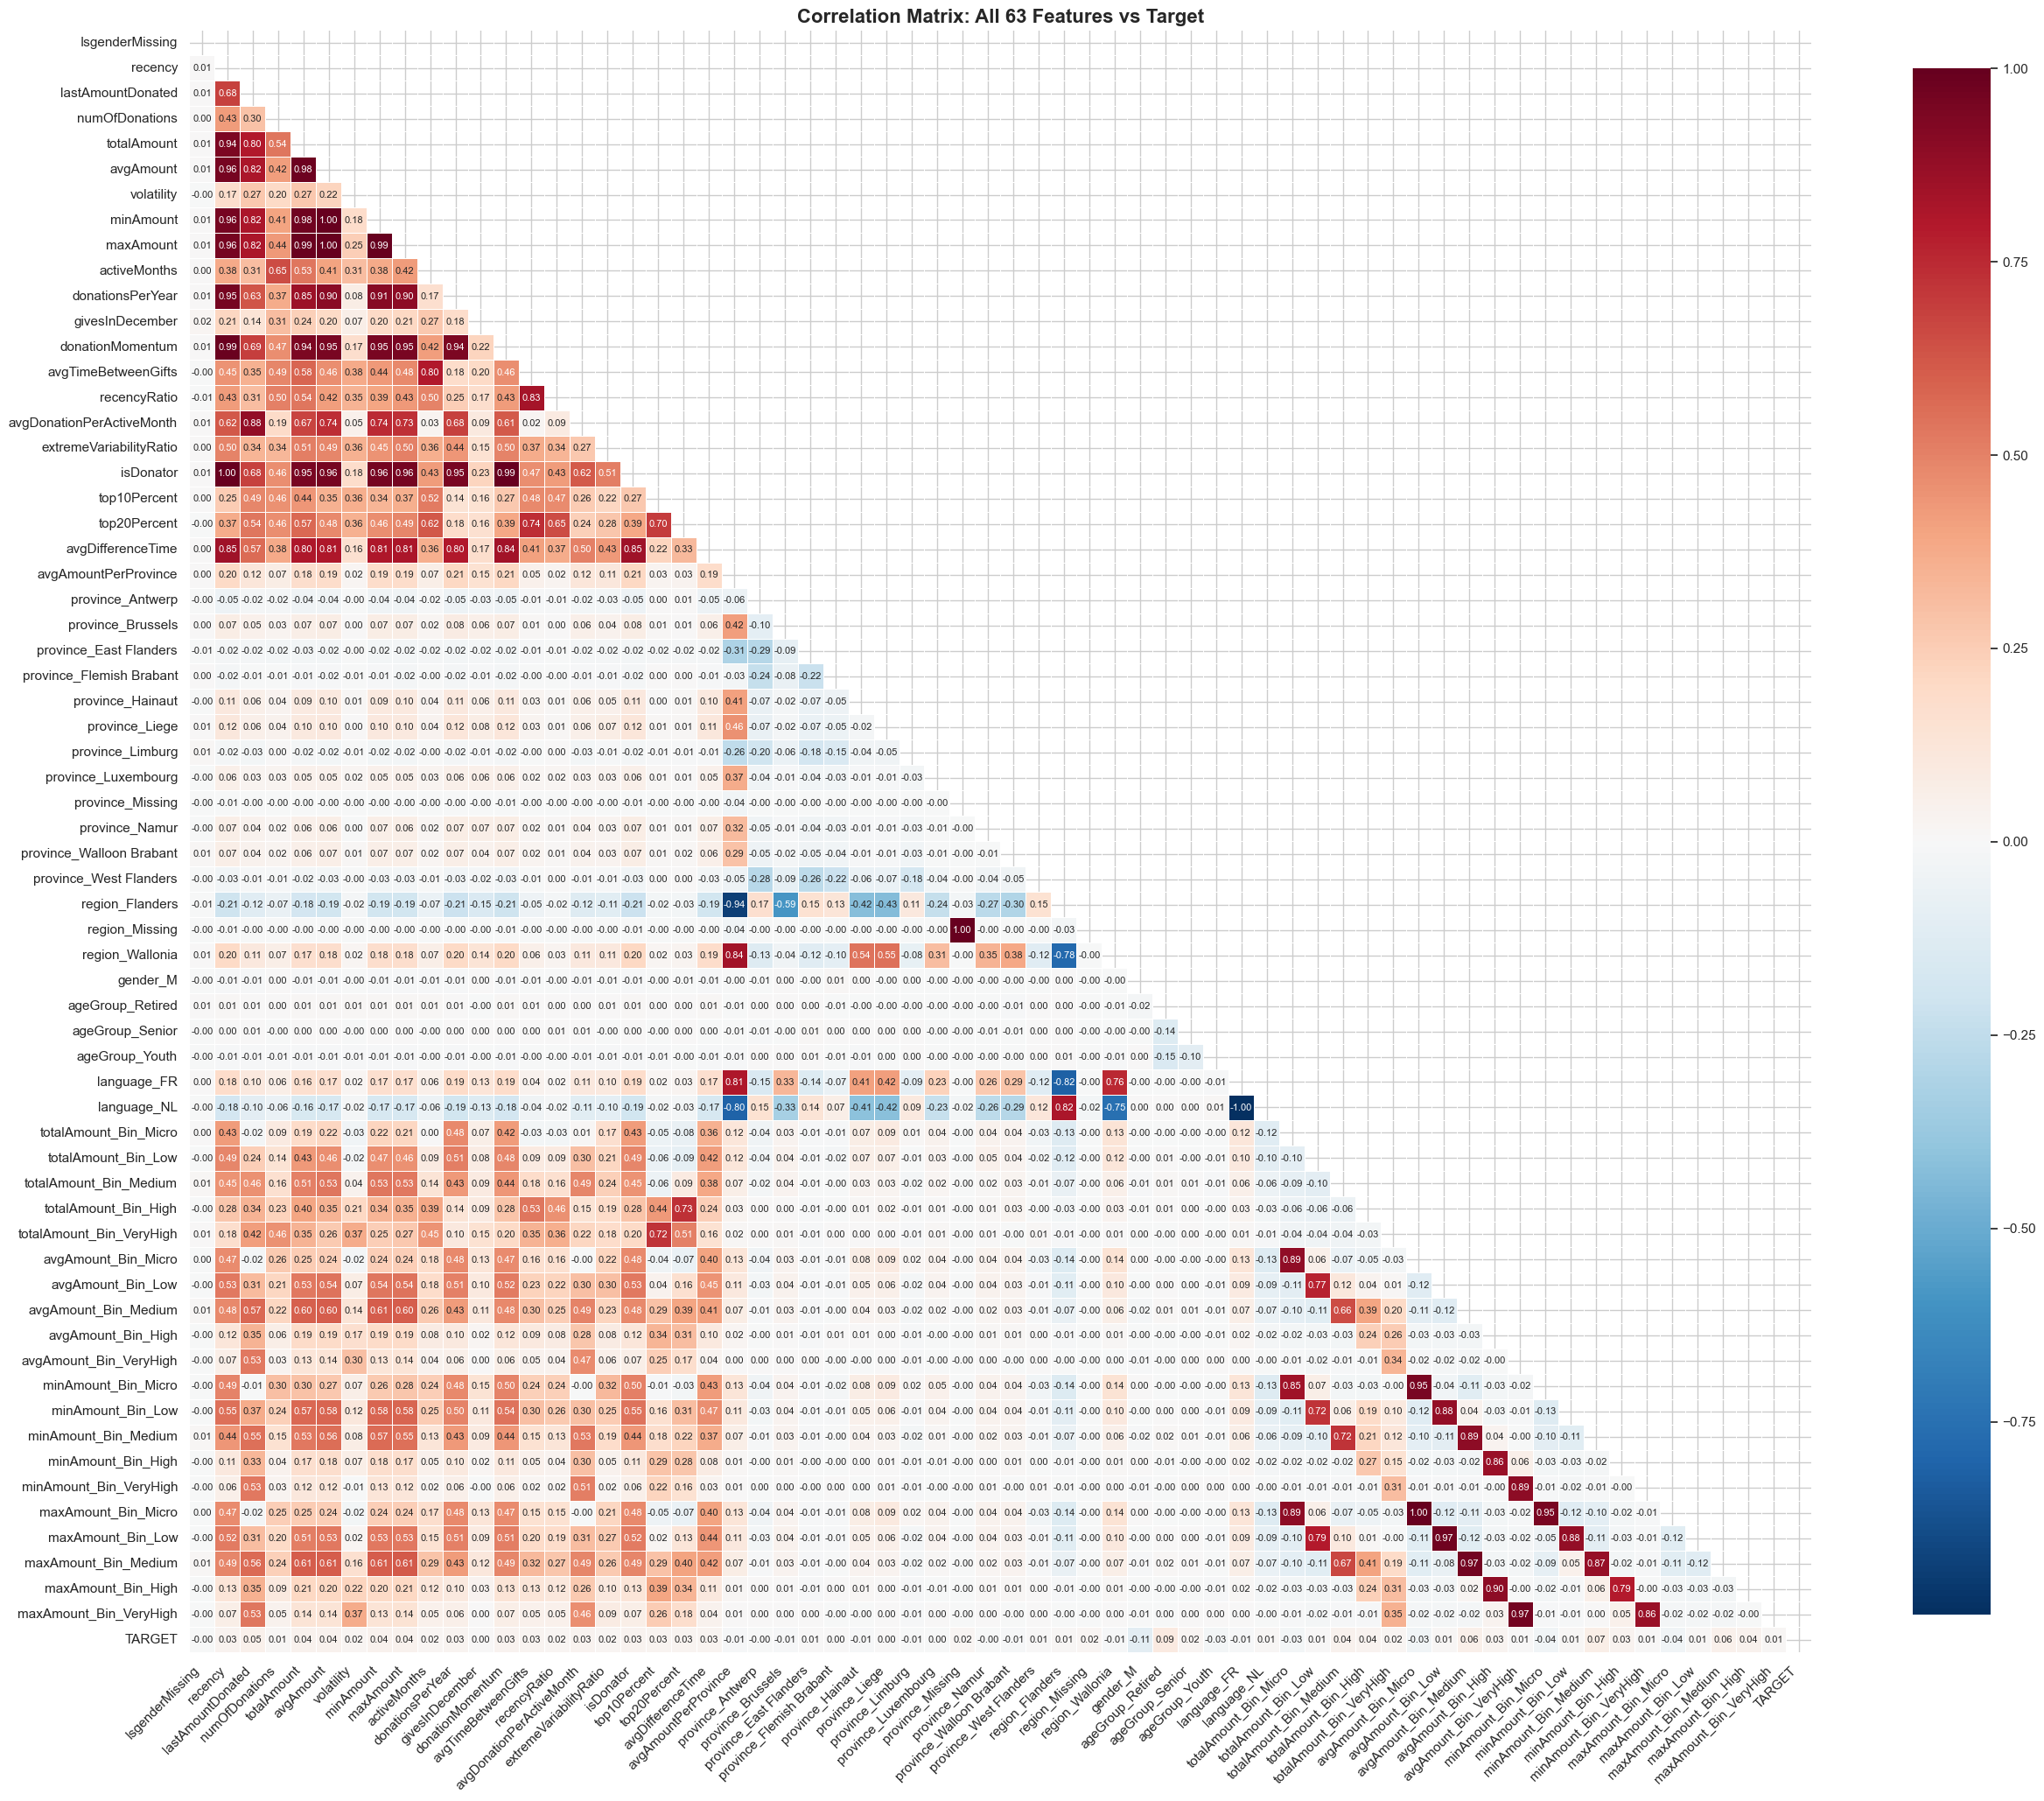

In [27]:
def plot_all_features_correlation_matrix(X, y):
    """
    Plots a correlation heatmap of ALL features and the Target.
    """
    # 1. Combine Features and Target temporarily
    df_analysis = X.copy()
    df_analysis['TARGET'] = y
    
    # 2. Create the Correlation Matrix for ALL features
    # (No filtering this time)
    final_corr_matrix = df_analysis.corr()
    
    # 3. Setup the Plot
    # Dynamic Figure Size: Scale the plot size based on the number of features
    n_features = len(final_corr_matrix.columns)
    fig_size = max(14, n_features * 0.4) # At least 14x14, or larger for many features
    
    plt.figure(figsize=(fig_size, fig_size))
    
    # Create a mask to hide the upper triangle (it's symmetrical and redundant)
    mask = np.triu(np.ones_like(final_corr_matrix, dtype=bool))
    
    # Generate the Heatmap
    sns.heatmap(
        final_corr_matrix, 
        mask=mask,
        annot=True,             # Show numbers
        fmt=".2f",              # 2 decimal places
        cmap='RdBu_r',          # Red=Positive, Blue=Negative
        center=0,               # Center the colors at 0
        linewidths=0.5, 
        cbar_kws={"shrink": 0.7},
        square=True,            # Make cells square
        annot_kws={"size": 8}   # Smaller font for numbers to fit
    )
    
    plt.title(f'Correlation Matrix: All {n_features-1} Features vs Target', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# --- RUN THE FUNCTION ---
# This will plot every feature currently in your x_train dataset
plot_all_features_correlation_matrix(x_train, y_train)

#### 5.1.1 Adjust Features based on correlation matrix

In [28]:
# 1. Calculate Correlation Matrix (Absolute values)
corr_matrix = x_train.corr().abs()

# 2. Select Upper Triangle of Correlation Matrix
# We only need the upper triangle because the matrix is symmetrical.
# This prevents dropping BOTH variables in a correlated pair.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Find Columns to Drop (Correlation > 0.8)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print(f"📉 Found {len(to_drop)} columns with correlation > 0.9:")
print(to_drop)

# 4. Drop from Training AND Validation Sets
x_train_reduced = x_train.drop(columns=to_drop)
x_valid_reduced = x_valid.drop(columns=to_drop)

print("\n✅ Columns removed.")
print(f"Original Shape: {x_train.shape}")
print(f"New Shape:      {x_train_reduced.shape}")


# --- 4. CREATE FINAL DATASETS ---
x_train_final = x_train_reduced
x_valid_final = x_valid_reduced

📉 Found 15 columns with correlation > 0.9:
['totalAmount', 'avgAmount', 'minAmount', 'maxAmount', 'donationsPerYear', 'donationMomentum', 'isDonator', 'region_Flanders', 'region_Missing', 'language_NL', 'minAmount_Bin_Micro', 'maxAmount_Bin_Micro', 'maxAmount_Bin_Low', 'maxAmount_Bin_Medium', 'maxAmount_Bin_VeryHigh']

✅ Columns removed.
Original Shape: (34874, 63)
New Shape:      (34874, 48)


## 6. Model Development & Evaluation

### 6.1 Logistic Regression Training & Validation

In [29]:
# # --- 1. PREPARE DATA ---
# x_valid_eval = x_valid_final.reindex(columns=x_train_final.columns, fill_value=0)

# # --- 2. DEFINE PARAMETER GRID ---
# C_list = [0.001, 0.01, 0.1, 1, 10, 100]
# penalties = ['l1', 'l2']
# class_weights = ['balanced']

# best_auc = 0
# best_acc = 0
# best_params = {}
# best_lr_model = None

# # Constants
# CONST_PARAMS = {
#     'solver': 'liblinear', # Supports both L1 and L2
#     'max_iter': 2000,
#     'random_state': 42
# }

# print(f"{'C':<8} | {'Penalty':<8} | {'Weight':<10} | {'Valid AUC':<10} | {'Valid Acc'}")
# print("-" * 65)

# # --- 3. THE TRAINING LOOP ---
# for c_val in C_list:
#     for pen in penalties:
#         for weight in class_weights:
            
#             # A. Initialize Model
#             lr = LogisticRegression(
#                 C=c_val,
#                 penalty=pen,
#                 class_weight=weight,
#                 **CONST_PARAMS
#             )
            
#             # B. TRAIN
#             lr.fit(x_train_final, y_train)
            
#             # C. VALIDATE
#             y_valid_prob = lr.predict_proba(x_valid_eval)[:, 1]
#             y_valid_pred = lr.predict(x_valid_eval)
            
#             # Calculate Scores
#             current_auc = roc_auc_score(y_valid, y_valid_prob)
#             current_acc = accuracy_score(y_valid, y_valid_pred)
            
#             # Print result
#             weight_str = str(weight) if weight else "None"
#             print(f"{c_val:<8} | {pen:<8} | {weight_str:<10} | {current_auc:.4f}     | {current_acc:.4f}")
            
#             # D. Save if Best
#             if current_auc > best_auc:
#                 best_auc = current_auc
#                 best_acc = current_acc
#                 best_lr_model = lr
#                 best_params = {
#                     'C': c_val,
#                     'penalty': pen,
#                     'class_weight': weight,
#                     **CONST_PARAMS
#                 }

# print("-" * 65)
# print(f"🏆 BEST VALIDATION AUC: {best_auc:.4f}")
# print(f"📊 CORRESPONDING ACCURACY: {best_acc:.4f}")
# print(f"⚙️ BEST PARAMETERS: {best_params}")

### 6.2 Random Forest Training & Validation

In [30]:
# # --- 1. PREPARE DATA ---
# # Ensure validation columns match training exactly
# x_valid_eval = x_valid_final.reindex(columns=x_train_final.columns, fill_value=0)

# # --- 2. DEFINE PARAMETER GRID ---
# n_estimators_list = [100, 300, 500]
# max_depth_list = [5, 10, 15]
# min_samples_leaf_list = [10, 30, 50]

# best_auc = 0
# best_acc = 0
# best_params = {}
# best_rf_model = None

# # Constants
# CONST_PARAMS = {
#     'class_weight': 'balanced',  # Critical for donor imbalance
#     'n_jobs': -1,
#     'random_state': 42
# }

# print(f"{'Trees':<6} | {'Depth':<6} | {'Leaf':<6} | {'Valid AUC':<10} | {'Valid Acc'}")
# print("-" * 65)

# # --- 3. THE TRAINING LOOP ---
# for n in n_estimators_list:
#     for d in max_depth_list:
#         for leaf in min_samples_leaf_list:
            
#             # A. Initialize Model
#             rf = RandomForestClassifier(
#                 n_estimators=n,
#                 max_depth=d,
#                 min_samples_leaf=leaf,
#                 **CONST_PARAMS
#             )
            
#             # B. TRAIN on Reduced Training Set
#             rf.fit(x_train_final, y_train)
            
#             # C. VALIDATE on Reduced Validation Set
#             y_valid_prob = rf.predict_proba(x_valid_eval)[:, 1]
#             y_valid_pred = rf.predict(x_valid_eval)
            
#             # Calculate Scores
#             current_auc = roc_auc_score(y_valid, y_valid_prob)
#             current_acc = accuracy_score(y_valid, y_valid_pred)
            
#             # Print result
#             print(f"{n:<6} | {d:<6} | {leaf:<6} | {current_auc:.4f}     | {current_acc:.4f}")
            
#             # D. Save if Best
#             if current_auc > best_auc:
#                 best_auc = current_auc
#                 best_acc = current_acc
#                 best_rf_model = rf
#                 best_params = {
#                     'n_estimators': n,
#                     'max_depth': d,
#                     'min_samples_leaf': leaf,
#                     **CONST_PARAMS
#                 }

# print("-" * 65)
# print(f"🏆 BEST VALIDATION AUC: {best_auc:.4f}")
# print(f"📊 CORRESPONDING ACCURACY: {best_acc:.4f}")
# print(f"⚙️ BEST PARAMETERS: {best_params}")

### 6.3 XGboost Validation Training & Validation

In [31]:
# # --- 1. PREPARE DATA ---
# # Ensure validation columns match training exactly
# x_valid_eval = x_valid_final.reindex(columns=x_train_final.columns, fill_value=0)

# # --- 2. CALCULATE EXACT SCALE_POS_WEIGHT ---
# # Formula: Negatives / Positives
# ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
# print(f"⚖️ Exact Imbalance Ratio (scale_pos_weight): {ratio:.2f}")

# # --- 3. DEFINE PARAMETER GRID ---
# n_estimators_list = [100, 300, 500]
# max_depth_list = [3, 5, 7]
# learning_rate_list = [0.01, 0.05, 0.1]
# min_child_weight_list = [1, 3, 5]

# best_auc = 0
# best_acc = 0
# best_params = {}
# best_xgb_model = None

# # Constants used for all models in the loop
# CONST_PARAMS = {
#     'scale_pos_weight': ratio,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',
#     'use_label_encoder': False,
#     'n_jobs': -1,
#     'random_state': 42
# }

# print(f"{'Trees':<6} | {'Depth':<6} | {'LR':<6} | {'MCW':<6} | {'Valid AUC':<10} | {'Valid Acc'}")
# print("-" * 70)

# # --- 4. THE TRAINING LOOP ---
# for n in n_estimators_list:
#     for d in max_depth_list:
#         for lr in learning_rate_list:
#             for mcw in min_child_weight_list:
                
#                 # A. Initialize Model (Using Grid + Constants)
#                 xgb = XGBClassifier(
#                     n_estimators=n,
#                     max_depth=d,
#                     learning_rate=lr,
#                     min_child_weight=mcw,
#                     **CONST_PARAMS  # Unpack constant parameters automatically
#                 )
                
#                 # B. TRAIN
#                 xgb.fit(x_train_final, y_train)
                
#                 # C. VALIDATE
#                 y_valid_prob = xgb.predict_proba(x_valid_eval)[:, 1]
#                 y_valid_pred = xgb.predict(x_valid_eval)
                
#                 # Calculate Scores
#                 current_auc = roc_auc_score(y_valid, y_valid_prob)
#                 current_acc = accuracy_score(y_valid, y_valid_pred)
                
#                 # Print result
#                 print(f"{n:<6} | {d:<6} | {lr:<6} | {mcw:<6} | {current_auc:.4f}     | {current_acc:.4f}")
                
#                 # D. Save Best (Including Constants!)
#                 if current_auc > best_auc:
#                     best_auc = current_auc
#                     best_acc = current_acc
#                     best_xgb_model = xgb
#                     # Save both tuned params AND constant params
#                     best_params = {
#                         'n_estimators': n,
#                         'max_depth': d,
#                         'learning_rate': lr,
#                         'min_child_weight': mcw,
#                         **CONST_PARAMS
#                     }

# print("-" * 70)
# print(f"🏆 BEST VALIDATION AUC: {best_auc:.4f}")
# print(f"📊 CORRESPONDING ACCURACY: {best_acc:.4f}")
# print(f"⚙️ BEST PARAMETERS (Saved for re-use): {best_params}")

### 6.4 CatBoost Training & Validation

In [32]:
# # --- 1. PREPARE DATA ---
# # Ensure validation columns match training exactly
# x_valid_eval = x_valid_final.reindex(columns=x_train_final.columns, fill_value=0)

# # --- 2. CALCULATE EXACT SCALE_POS_WEIGHT ---
# ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
# print(f"⚖️ Exact Imbalance Ratio (scale_pos_weight): {ratio:.2f}")

# # --- 3. DEFINE PARAMETER GRID ---
# iterations_list = [100, 300, 500]
# depth_list = [4, 6, 8]          # CatBoost standard is 6. Deep trees >10 are very slow.
# learning_rate_list = [0.01, 0.05, 0.1]
# l2_leaf_reg_list = [1, 3, 5]    # Equivalent to min_child_weight/regularization

# best_auc = 0
# best_acc = 0
# best_params = {}
# best_cb_model = None

# # Constants used for all models
# CONST_PARAMS = {
#     'scale_pos_weight': ratio,
#     'loss_function': 'Logloss',
#     'eval_metric': 'AUC',
#     'verbose': 0,               # Silent mode
#     'random_seed': 42,
#     'allow_writing_files': False # Prevents creating 'catboost_info' folders
# }

# print(f"{'Iters':<6} | {'Depth':<6} | {'LR':<6} | {'L2':<6} | {'Valid AUC':<10} | {'Valid Acc'}")
# print("-" * 70)

# # --- 4. THE TRAINING LOOP ---
# for n in iterations_list:
#     for d in depth_list:
#         for lr in learning_rate_list:
#             for l2 in l2_leaf_reg_list:
                
#                 # A. Initialize Model
#                 cb = CatBoostClassifier(
#                     iterations=n,
#                     depth=d,
#                     learning_rate=lr,
#                     l2_leaf_reg=l2,
#                     **CONST_PARAMS
#                 )
                
#                 # B. TRAIN
#                 # Note: CatBoost handles pandas dataframes directly
#                 cb.fit(x_train_final, y_train)
                
#                 # C. VALIDATE
#                 y_valid_prob = cb.predict_proba(x_valid_eval)[:, 1]
#                 y_valid_pred = cb.predict(x_valid_eval)
                
#                 # Calculate Scores
#                 current_auc = roc_auc_score(y_valid, y_valid_prob)
#                 current_acc = accuracy_score(y_valid, y_valid_pred)
                
#                 # Print result
#                 print(f"{n:<6} | {d:<6} | {lr:<6} | {l2:<6} | {current_auc:.4f}     | {current_acc:.4f}")
                
#                 # D. Save Best
#                 if current_auc > best_auc:
#                     best_auc = current_auc
#                     best_acc = current_acc
#                     best_cb_model = cb
#                     best_params = {
#                         'iterations': n,
#                         'depth': d,
#                         'learning_rate': lr,
#                         'l2_leaf_reg': l2,
#                         **CONST_PARAMS
#                     }

# print("-" * 70)
# print(f"🏆 BEST VALIDATION AUC: {best_auc:.4f}")
# print(f"📊 CORRESPONDING ACCURACY: {best_acc:.4f}")
# print(f"⚙️ BEST PARAMETERS (Saved for re-use): {best_params}")

In [33]:
# *********************************************
# # Cat Boost gives the highest AUC
# *********************************************

### 🏆6.5 CatBoost Chosen

#### 6.5.1 CatBoost Training

In [34]:
# --- 1. INITIALIZE MODEL ---
# Pick the Params that gave highest AUC
cb_optimized = CatBoostClassifier(
    iterations=100,
    depth=4,                  
    learning_rate=0.1,
    l2_leaf_reg=3,            
    scale_pos_weight=35.70947368421053,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=0,
    random_seed=42,
    allow_writing_files=False
)

#### 6.5.2 CatBoost Validation

In [35]:

print("\n🚀 Training CatBoost Model (Depth=4, L2=3)...")

# --- 3. TRAIN THE MODEL ---
cb_optimized.fit(x_train_final, y_train)


y_valid_prob = cb_optimized.predict_proba(x_valid_final)[:, 1]
y_valid_pred = cb_optimized.predict(x_valid_final)

# --- 5. REPORT RESULTS ---
final_auc = roc_auc_score(y_valid, y_valid_prob)
final_acc = accuracy_score(y_valid, y_valid_pred)

print("-" * 40)
print(f"🏆 MODEL RESULTS")
print("-" * 40)
print(f"AUC Score:  {final_auc:.4f}")
print(f"Accuracy:   {final_acc:.4f}")
print("-" * 40)


🚀 Training CatBoost Model (Depth=4, L2=3)...
----------------------------------------
🏆 MODEL RESULTS
----------------------------------------
AUC Score:  0.7301
Accuracy:   0.7254
----------------------------------------


#### 6.5.3 Confusion Matrix


--- CLASSIFICATION REPORT ---
               precision    recall  f1-score   support

Non-Donor (0)       0.99      0.73      0.84     25428
    Donor (1)       0.02      0.56      0.03       217

     accuracy                           0.73     25645
    macro avg       0.51      0.64      0.44     25645
 weighted avg       0.99      0.73      0.83     25645



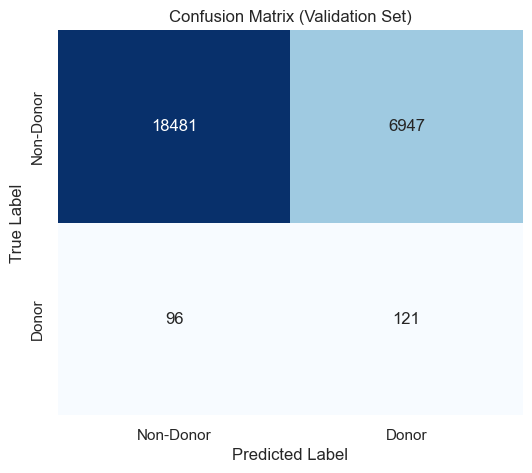

In [36]:
# --- DETAILED METRICS (Validation Set) ---
print("\n--- CLASSIFICATION REPORT ---")
# Using y_valid (Truth) and y_valid_pred (Model Predictions)
print(classification_report(y_valid, y_valid_pred, target_names=['Non-Donor (0)', 'Donor (1)']))

# --- CONFUSION MATRIX VISUALIZATION ---
cm = confusion_matrix(y_valid, y_valid_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Donor', 'Donor'],
            yticklabels=['Non-Donor', 'Donor'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Validation Set)')
plt.show()

## 7. Campaign Performance & Strategic Insights

### 7.1 Drivers of Donations 

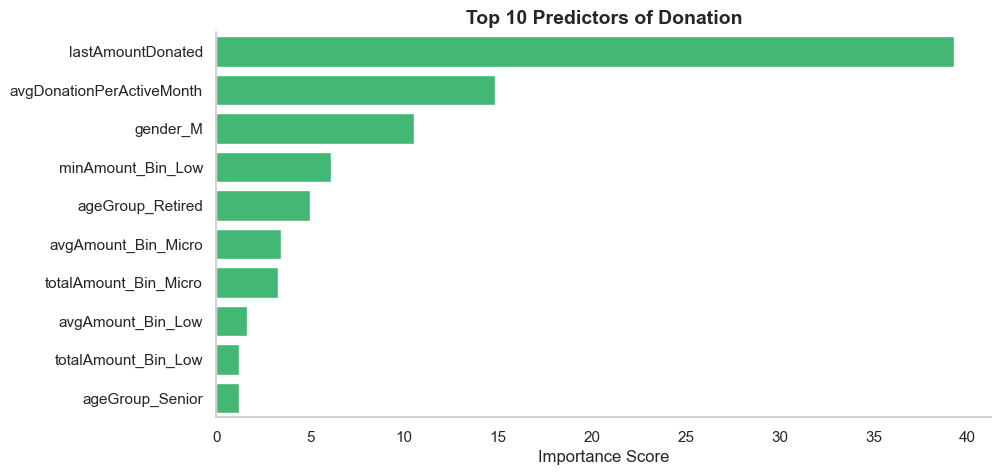

In [37]:
# Get feature importance
importance = cb_optimized.get_feature_importance()
names = x_train_final.columns

# Create DataFrame
fi_df = pd.DataFrame({'Feature': names, 'Importance': importance})
fi_df = fi_df.sort_values(by='Importance', ascending=False).head(10) # Top 10 drivers

# Plot
plt.figure(figsize=(10, 5))
# Using a specific color to look professional
sns.barplot(x='Importance', y='Feature', data=fi_df, color='#2ecc71') 
plt.title('Top 10 Predictors of Donation', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('')
# Clean layout
plt.grid(False)
sns.despine()
plt.show()

### 7.2 Lift, response, and gains

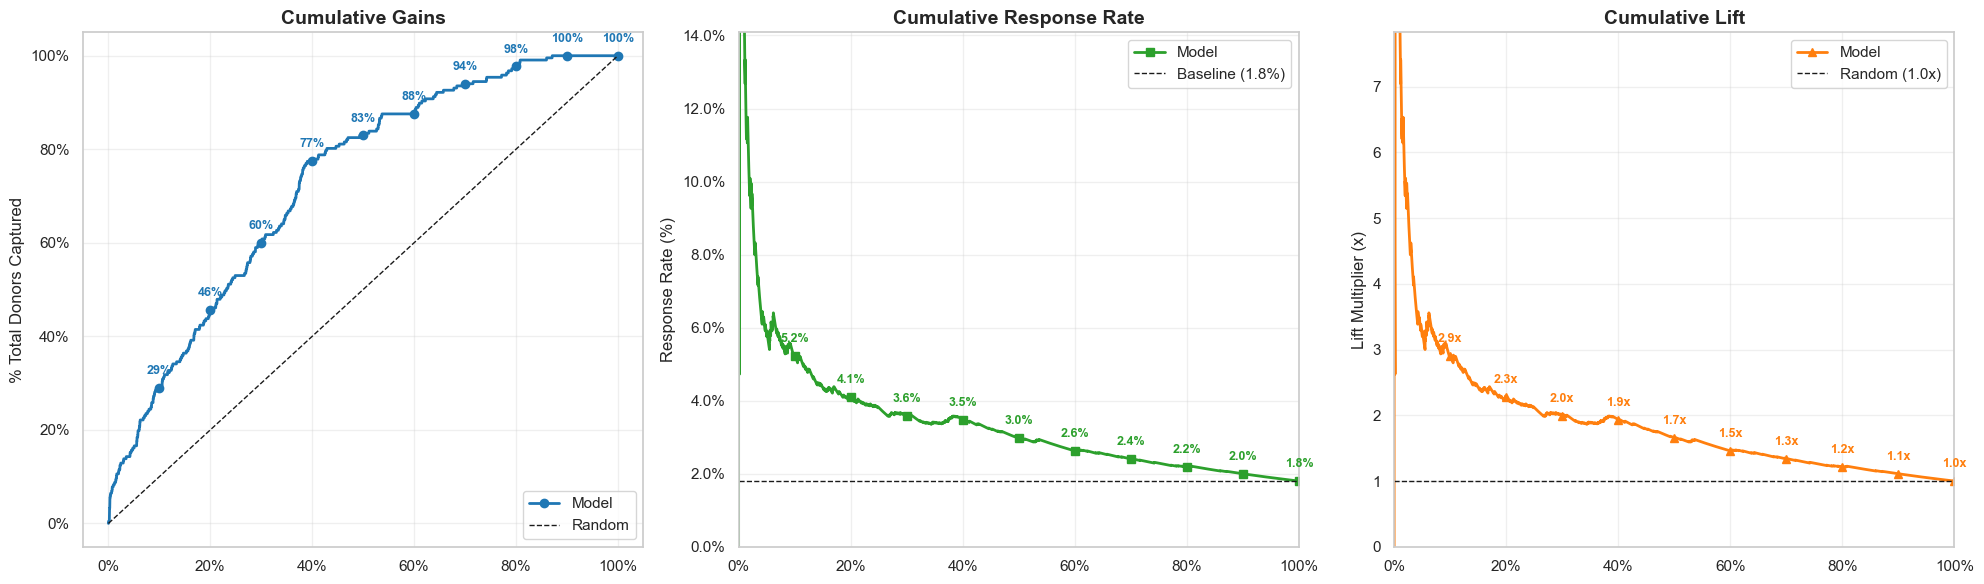

In [38]:
def plot_three_metrics_with_labels(y_true, y_probs, target_baseline=1.8):
    """
    Plots 3 Charts: Gains, Response Rate, and Lift.
    Includes text labels at deciles and clean formatting.
    """
    # 1. Prepare Data
    data = pd.DataFrame({'y_true': y_true, 'prob': y_probs})
    data = data.sort_values(by='prob', ascending=False).reset_index(drop=True)
    
    total_donors = data['y_true'].sum()
    n_rows = len(data)
    
    data['cum_rows'] = np.arange(1, n_rows + 1)
    data['cum_donors'] = data['y_true'].cumsum()
    
    # 2. Metrics
    data['percent_contacted'] = data['cum_rows'] / n_rows
    data['percent_captured'] = data['cum_donors'] / total_donors
    
    # --- Standardized Response Rate ---
    data['raw_rate'] = data['cum_donors'] / data['cum_rows']
    actual_mean = data['y_true'].mean()
    target_mean = target_baseline / 100.0
    scaling_factor = target_mean / actual_mean
    data['scaled_rate'] = data['raw_rate'] * scaling_factor
    
    # --- Standardized Lift ---
    # Lift = Response Rate / Baseline (1.8%)
    # Since scaled_rate is already adjusted to target_mean, we divide by target_mean
    data['lift'] = data['scaled_rate'] / target_mean

    # 3. Define Marker Points (Deciles)
    indices = [int(n_rows * i / 10) - 1 for i in range(1, 11)]
    indices[-1] = n_rows - 1 

    # --- PLOTTING (3 CHARTS) ---
    fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # Wider figure for 3 charts
    
    # =============================================
    # CHART A: Cumulative Gains
    # =============================================
    ax1 = axes[0]
    ax1.plot(data['percent_contacted'], data['percent_captured'], label='Model', 
             linewidth=2, color='tab:blue', marker='o', markersize=6, markevery=indices)
    
    ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
    ax1.set_title('Cumulative Gains', fontsize=14, fontweight='bold')
    ax1.set_ylabel('% Total Donors Captured')
    ax1.set_xlabel('') # Removed Label
    
    # Labels
    for i in indices:
        x = data.loc[i, 'percent_contacted']
        y = data.loc[i, 'percent_captured']
        ax1.annotate(f"{y:.0%}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='tab:blue', fontweight='bold')

    ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax1.legend(loc='lower right')
    ax1.grid(True, alpha=0.3)
    
    # =============================================
    # CHART B: Cumulative Response Rate
    # =============================================
    ax2 = axes[1]
    ax2.plot(data['percent_contacted'], data['scaled_rate'], label='Model', 
             linewidth=2, color='tab:green', marker='s', markersize=6, markevery=indices)
    
    ax2.axhline(y=target_mean, color='k', linestyle='--', label=f'Baseline ({target_baseline}%)', linewidth=1)
    
    ax2.set_title('Cumulative Response Rate', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Response Rate (%)')
    ax2.set_xlabel('') # Removed Label
    
    # Labels
    for i in indices:
        x = data.loc[i, 'percent_contacted']
        y = data.loc[i, 'scaled_rate']
        # Skip label if it's the 1st decile and way off chart
        if i == indices[0] and y > (data['scaled_rate'].head(int(n_rows*0.05)).mean() * 1.5): continue
        ax2.annotate(f"{y:.1%}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='tab:green', fontweight='bold')

    ax2.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax2.set_xlim(0, 1.0)
    top_rate = data['scaled_rate'].head(int(n_rows * 0.05)).mean()
    ax2.set_ylim(0, top_rate * 1.3)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # =============================================
    # CHART C: Cumulative Lift
    # =============================================
    ax3 = axes[2]
    ax3.plot(data['percent_contacted'], data['lift'], label='Model', 
             linewidth=2, color='tab:orange', marker='^', markersize=6, markevery=indices)
    
    ax3.axhline(y=1.0, color='k', linestyle='--', label='Random (1.0x)', linewidth=1)
    
    ax3.set_title('Cumulative Lift', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Lift Multiplier (x)')
    ax3.set_xlabel('') # Removed Label
    
    # Labels
    for i in indices:
        x = data.loc[i, 'percent_contacted']
        y = data.loc[i, 'lift']
        # Skip label if too high
        if i == indices[0] and y > (data['lift'].head(int(n_rows*0.05)).mean() * 1.5): continue
        ax3.annotate(f"{y:.1f}x", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='tab:orange', fontweight='bold')

    ax3.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax3.set_xlim(0, 1.0)
    
    # Dynamic Y-Axis for Lift
    top_lift = data['lift'].head(int(n_rows * 0.05)).mean()
    ax3.set_ylim(0, top_lift * 1.3)
    
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# --- RUN ---
plot_three_metrics_with_labels(y_valid, y_valid_prob, target_baseline=1.8)

### 7.3 Avg Donation

In [39]:
# --- 1. SETUP DATES ---
# "DV starts at Jun 19 2019 and ends after 60 days"
start_date = pd.to_datetime("2019-05-19")
end_date = start_date + timedelta(days=60)

print(f"📅 Analysis Window: {start_date.date()} to {end_date.date()}")


# Get the list of people targeted in Campaign 7244
# (Assuming you have this dataframe loaded as 'selection7244' or similar)
target_donors = selection7244['donorID']

# --- 3. APPLY FILTERS ---
# A. Filter for donors in the campaign
campaign_gifts = gift_mod[gift_mod['donorID'].isin(target_donors)]

# B. Filter for the 60-day Time Window
# This attributes the gift to the campaign
campaign_gifts_dv = campaign_gifts[
    (campaign_gifts['donationDate'] >= start_date) & 
    (campaign_gifts['donationDate'] <= end_date)
]

# C. Filter for Amount > 30
# "Donators that donated more than 30"
donor_totals = campaign_gifts_dv.groupby('donorID')['amount'].sum().reset_index()

high_value_gifts = donor_totals[donor_totals['amount'] >= 30]

# --- 4. CALCULATE ---
avg_donation_specific = high_value_gifts['amount'].mean()

print("=" * 50)
print(f"💰 CUSTOM CALCULATION (Campaign 7244)")
print("=" * 50)
print(f"Criteria:         > €30.00 | 60-Day Window")
print(f"Donations Found:  {len(high_value_gifts)}")
print("-" * 50)
print(f"✅ CALCULATED AVG: €{avg_donation_specific:.2f}")
print("=" * 50)

📅 Analysis Window: 2019-05-19 to 2019-07-18
💰 CUSTOM CALCULATION (Campaign 7244)
Criteria:         > €30.00 | 60-Day Window
Donations Found:  272
--------------------------------------------------
✅ CALCULATED AVG: €75.11


## 8. Scoring Campaign 7362 

In [40]:
# This forces x_test to look EXACTLY like x_train_final
# It drops columns you removed in training.
# It adds columns you had in training but are missing in test (filling with 0).
x_test_final = x_test.reindex(columns=x_train_final.columns, fill_value=0)

# 1. PREDICT FOR KNOWN DONORS
# We already have these probabilities from the previous step
known_probs = cb_optimized.predict_proba(x_test_final)[:, 1]

# 2. IDENTIFY MISSING DONORS
# Get the list of IDs we actually predicted for
# (These are the ones that survived the inner merge inside process_campaign_data)
# We need to reconstruct which IDs correspond to 'known_probs'.
# The safest way is to re-run the merge locally to get the exact ID order.
final_submission = pd.merge(selection7362, donor_mod[['donorID']], on='donorID', how='inner')
final_submission['score'] = known_probs

final_submission.to_csv('../data/scoring 7326.csv', index=False)

In [41]:
x_test_final

,IsgenderMissing,recency,lastAmountDonated,numOfDonations,volatility,activeMonths,givesInDecember,avgTimeBetweenGifts,recencyRatio,avgDonationPerActiveMonth,...,avgAmount_Bin_Micro,avgAmount_Bin_Low,avgAmount_Bin_Medium,avgAmount_Bin_High,avgAmount_Bin_VeryHigh,minAmount_Bin_Low,minAmount_Bin_Medium,minAmount_Bin_High,minAmount_Bin_VeryHigh,maxAmount_Bin_High
0,0,-0.681584,-0.465853,-0.317566,-0.125031,-0.291407,0,-0.320437,-0.292353,-0.421269,...,0,0,0,0,0,0,0,0,0,0
1,0,-0.681584,-0.465853,-0.317566,-0.125031,-0.291407,0,-0.320437,-0.292353,-0.421269,...,0,0,0,0,0,0,0,0,0,0
2,0,-0.681584,-0.465853,-0.317566,-0.125031,-0.291407,0,-0.320437,-0.292353,-0.421269,...,0,0,0,0,0,0,0,0,0,0
3,0,0.574486,2.471687,1.401679,7.125808,5.939552,0,3.642754,-0.113793,-0.069051,...,0,0,0,1,0,0,1,0,0,1
4,0,-0.681584,-0.465853,-0.317566,-0.125031,-0.291407,0,-0.320437,-0.292353,-0.421269,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26506,0,-0.681584,-0.465853,-0.317566,-0.125031,-0.291407,0,-0.320437,-0.292353,-0.421269,...,0,0,0,0,0,0,0,0,0,0
26507,0,-0.681584,-0.465853,-0.317566,-0.125031,-0.291407,0,-0.320437,-0.292353,-0.421269,...,0,0,0,0,0,0,0,0,0,0
26508,0,1.458001,1.670540,0.255516,-0.125031,-0.123003,0,-0.320437,-0.292353,2.061029,...,0,0,1,0,0,0,1,0,0,0
26509,0,1.386337,0.602344,0.255516,-0.125031,-0.123003,0,-0.320437,-0.292353,0.819880,...,0,1,0,0,0,1,0,0,0,0


## 9. Profiling

### 9.1 Create the function removing the one hot endocing and the standardizing for test set 

In [42]:
def process_campaign_data(gift_cleaned, donor_cleaned, campaign_cleaned, campaign_selection, campaign_drop_date, target_campaign_id, scaler=None):
    """
    Process data WITH Binning enabled and a 60-Day Target Window.
    """
    
    # 1. Setup Copies
    campaign_selected = campaign_selection.copy()
    gift_mod = gift_cleaned.copy()
    donor_mod = donor_cleaned.copy()
    campaign_mod = campaign_cleaned.copy()
    
    # 2. Date Logic (1-Day Gap)
    drop_date = pd.to_datetime(campaign_drop_date)
    iv_end = drop_date - pd.Timedelta(days=1)
    iv_start = iv_end - pd.DateOffset(years=5)
    dv_start = drop_date + pd.Timedelta(days=1)
    
    # --- CHANGED: 60-DAY WINDOW ---
    dv_end = dv_start + pd.Timedelta(days=60) 

    # 3. Merge Base Table
    base_table = pd.merge(campaign_selected, donor_mod, on="donorID", how="inner")

    # 4. Age Calculation
    base_table["age"] = round((iv_end - pd.to_datetime(base_table["dateOfBirth"])).dt.days / 365)
    base_table['ageGroup'] = "Unknown" 
    base_table.loc[base_table['age'] <= 29, "ageGroup"] = "Youth"
    base_table.loc[(base_table['age'] >= 30) & (base_table['age'] <= 59), "ageGroup"] = "Adult"
    base_table.loc[(base_table['age'] >= 60) & (base_table['age'] <= 65), "ageGroup"] = "Senior"
    base_table.loc[base_table['age'] >= 66, "ageGroup"] = "Retired"
    
    # 5. Gift Features (IV Period Only)
    gift_iv = gift_mod.loc[(gift_mod['donationDate'] >= iv_start) & (gift_mod['donationDate'] <= iv_end)]
    
    # Recency
    max_donate_date = gift_iv.groupby("donorID")['donationDate'].max().reset_index().rename(columns={"donationDate" : "maxDonateDate"})
    max_donate_date['recency'] = (pd.to_datetime(iv_end) - max_donate_date['maxDonateDate']).dt.days
    base_table = pd.merge(base_table, max_donate_date[['donorID', 'recency']], on="donorID", how="left")
    base_table['recency'] = base_table['recency'].fillna(-1).astype(int)
    
    # Last Amount
    last_donation_amount = pd.merge(gift_iv, max_donate_date[['donorID', "maxDonateDate"]], on="donorID", how="inner")
    last_donation_amount['lastAmountDonated'] = last_donation_amount.loc[last_donation_amount['donationDate'] == last_donation_amount['maxDonateDate'], "amount"]
    last_donation_summed = (last_donation_amount.groupby(['donorID', 'maxDonateDate'])['lastAmountDonated'].sum().reset_index())
    base_table = pd.merge(base_table, last_donation_summed[['donorID', "lastAmountDonated"]], on="donorID", how="left")
    base_table['lastAmountDonated'] = base_table['lastAmountDonated'].fillna(0)
    
    # Frequency
    num_of_donations = gift_iv.groupby("donorID").size().reset_index(name="numOfDonations")
    base_table = pd.merge(base_table, num_of_donations, on="donorID", how="left")
    base_table['numOfDonations'] = base_table['numOfDonations'].fillna(0).astype(int)
    
    # Monetary Aggregates
    AmountAgg = (gift_iv.groupby("donorID")["amount"].agg(totalAmount="sum", avgAmount="mean", volatility="std", minAmount="min", maxAmount="max").reset_index())
    base_table = pd.merge(base_table, AmountAgg, on="donorID", how="left")
    
    # Fill NA for aggregates
    cols_to_fill = ['totalAmount', 'avgAmount', 'minAmount', 'maxAmount', 'volatility']
    base_table[cols_to_fill] = base_table[cols_to_fill].fillna(0)
    
    # Active Months
    duration = (gift_iv.groupby("donorID")['donationDate'].agg(firstDate="min", lastDate="max"))
    duration['activeMonths'] = ((duration['lastDate'].dt.to_period('M') - duration['firstDate'].dt.to_period('M')).apply(lambda x: x.n) + 1)
    base_table = pd.merge(base_table, duration['activeMonths'], on="donorID", how="left")
    base_table['activeMonths'] = base_table['activeMonths'].fillna(0)

    # 6. Advanced Features
    base_table['donationsPerYear'] = np.where(base_table['activeMonths'] > 0, base_table['numOfDonations'] / (base_table['activeMonths'] / 12), 0)
    
    december_donors = gift_iv[gift_iv['donationDate'].dt.month == 12]['donorID'].unique()
    base_table['givesInDecember'] = base_table['donorID'].isin(december_donors).astype(int)
    
    base_table['donationMomentum'] = np.where(base_table['avgAmount'] > 0, base_table['lastAmountDonated'] / base_table['avgAmount'], 0)
                                              
    base_table['avgTimeBetweenGifts'] = np.where(base_table['numOfDonations'] > 1, (base_table['activeMonths'] * 30.44) / (base_table['numOfDonations'] - 1), 0)
    
    base_table['recencyRatio'] = np.where(base_table['avgTimeBetweenGifts'] > 0, base_table['recency'] / base_table['avgTimeBetweenGifts'], 0)

    # Existing Ratios
    base_table['avgDonationPerActiveMonth'] = np.where(base_table['activeMonths'] > 0, base_table['totalAmount'] / base_table['activeMonths'], 0)
    base_table['extremeVariabilityRatio'] = np.where(base_table['minAmount'] > 0, base_table["maxAmount"] / base_table['minAmount'], 0)
    
    # Percentile Flags
    base_table['isDonator'] = (base_table['totalAmount'] > 0).astype(int)
    donators = base_table[base_table['isDonator'] == 1]
    
    if not donators.empty:
        top_10_percent = donators['totalAmount'].quantile(0.9)
        base_table["top10Percent"] = (base_table['totalAmount'] >= top_10_percent).astype(int)
        top_20_percent = donators['totalAmount'].quantile(0.8)
        base_table["top20Percent"] = (base_table['totalAmount'] >= top_20_percent).astype(int)
    else:
        base_table["top10Percent"] = 0
        base_table["top20Percent"] = 0
    
    # Campaign Interaction
    gift_iv_campaign = pd.merge(gift_iv, campaign_mod[['campaignID', "campaignDate"]], on="campaignID", how="left")
    gift_iv_campaign["differenceTime"] = (gift_iv_campaign["donationDate"] - gift_iv_campaign["campaignDate"]).dt.days.fillna(-1).astype(int)
    avgDaysFromCampaign = (gift_iv_campaign.groupby("donorID")['differenceTime'].mean().reset_index(name="avgDifferenceTime"))
    base_table = pd.merge(base_table, avgDaysFromCampaign, on="donorID", how="left")
    base_table['avgDifferenceTime'] = base_table['avgDifferenceTime'].fillna(0)
    
    # Geographic Features
    province_avg = base_table.groupby('province')['totalAmount'].mean().reset_index(name='avgAmountPerProvince')
    base_table = pd.merge(base_table, province_avg, on='province', how='left')
    base_table['avgAmountPerProvince'] = base_table['avgAmountPerProvince'].fillna(0)

    # --- ADDED: BINNING ENABLED ---
    bins = [-1, 0.001, 10, 30, 60, 120, 1000000]
    labels = ['Zero', 'Micro', 'Low', 'Medium', 'High', 'VeryHigh']
    cols_to_bin = ['totalAmount', 'avgAmount', 'minAmount', 'maxAmount']
    
    for col in cols_to_bin:
        base_table[f'{col}_Bin'] = pd.cut(base_table[col], bins=bins, labels=labels)
    
    # 11. Final Split
    cols_to_drop = ['target', 'zipcode', 'dateOfBirth']
    X_set = base_table.drop(columns=[c for c in cols_to_drop if c in base_table.columns])
    
    return X_set

x_test_raw = process_campaign_data(gift_mod, donor_mod, campaign_mod, selection7362, "2020-02-01", "7362", scaler=train_scaler)

### 9.2 Top 20 percent 

In [43]:
# 9.2 Top 20 percent 
# 1. PREPARE SCORE DATA
# Select donorID and score, and rename 'score' to 'Score' for clarity.
score_key_df = final_submission[["donorID", 'score']].copy()
score_key_df.columns = ["donorID", 'Score']

# 2. ALIGN FEATURES AND SCORES VIA INNER MERGE
# This is the definitive fix for the length mismatch (26522 vs 26511), 
# as it only keeps IDs present in BOTH lists.
df_aligned_final = x_test_raw.merge(
    score_key_df, 
    on="donorID", 
    how='inner' 
)

# 3. CALCULATE TOP 20% CUTOFF AND FILTER
cutoff_20_percent = df_aligned_final['Score'].quantile(0.80)
top_20_percent_list = df_aligned_final[df_aligned_final['Score'] >= cutoff_20_percent].copy()


print("=" * 60)
print(f"✅ DATA ALIGNED. TOP 20% LIST CREATED (Total Donors: {len(top_20_percent_list):,})")
print(f"Cutoff Score (80th percentile): {cutoff_20_percent:.5f}")
print("=" * 60)

✅ DATA ALIGNED. TOP 20% LIST CREATED (Total Donors: 5,819)
Cutoff Score (80th percentile): 0.46449


### 9.3 Summary 

In [44]:
def summarize_features_adjusted(df, max_categories=43):
    """
    Prints useful information about every column in the dataframe, 
    with specialized aggregation for Numerical and Geographical features.
    """
    total_count = len(df)

    for col in df.columns:
        print("="*80)
        print(f"📌 Column: {col}")
        print(f"Type: {df[col].dtype}")

        # Missing and unique values
        print(f"Missing values: {df[col].isna().sum()}")
        print(f"Unique values: {df[col].nunique()}")

        # Numerical columns → Custom Aggregation
        if pd.api.types.is_numeric_dtype(df[col]):
            print("\nSummary statistics (Targeted Aggregation):")
            
            # Custom Aggregations: Mean, Median, and Max
            stats = {
                'Count': df[col].count(),
                'Mean': df[col].mean(),
                'Median': df[col].median(),
                'Std': df[col].std(),
                'Max': df[col].max()
            }
            print(pd.Series(stats).to_string(float_format="%.2f"))

        # Categorical or low-cardinality columns → Value Counts
        elif df[col].nunique() <= max_categories:
            print("\nValue counts:")
            
            # SPECIAL CASE: Geographic Features (Top 3 with Percentage)
            if col in ['province', 'region']:
                top_3 = df[col].value_counts(dropna=False).head(3)
                top_3_df = pd.DataFrame(top_3)
                top_3_df['Percentage'] = (top_3 / total_count) * 100
                top_3_df.columns = ['Count', 'Percentage']
                print("--- TOP 3 GEOGRAPHIC BREAKDOWN ---")
                print(top_3_df.to_string(float_format="%.1f"))
                print("----------------------------------")
            else:
                # Standard value counts for other categorical features
                print(df[col].value_counts(dropna=False))

        # High-cardinality text columns
        else:
            print("\nHigh-cardinality column — showing 10 sample values:")
            print(df[col].dropna().unique()[:10])

        print("\n")


# -----------------------------------------------------------------
# --- EXECUTION: RUN SUMMARIZE_FEATURES_ADJUSTED ON THE TARGET LIST ---
# -----------------------------------------------------------------

# This section assumes the data alignment and filtering steps (from the user's code) 
# have created the 'top_20_percent_list' DataFrame.

print("=" * 80)
print(f"REPORT START: PROFILING OF THE TOP 20% DONOR SEGMENT (ADJUSTED SUMMARY)")
print("=" * 80)

# Columns to exclude (IDs and Score)
cols_to_exclude = ['donorID', 'Score']
final_profile_data = top_20_percent_list.drop(
    columns=[c for c in cols_to_exclude if c in top_20_percent_list.columns], 
    errors='ignore'
)

# Call your adjusted summarization function
summarize_features_adjusted(final_profile_data)

REPORT START: PROFILING OF THE TOP 20% DONOR SEGMENT (ADJUSTED SUMMARY)
📌 Column: province
Type: object
Missing values: 0
Unique values: 13

Value counts:
--- TOP 3 GEOGRAPHIC BREAKDOWN ---
                 Count  Percentage
province                          
East Flanders     1595        27.4
Flemish Brabant   1162        20.0
Antwerp            877        15.1
----------------------------------


📌 Column: region
Type: object
Missing values: 0
Unique values: 4

Value counts:
--- TOP 3 GEOGRAPHIC BREAKDOWN ---
          Count  Percentage
region                     
Flanders   5349        91.9
Wallonia    255         4.4
Brussels    214         3.7
----------------------------------


📌 Column: gender
Type: object
Missing values: 0
Unique values: 2

Value counts:
gender
F    5347
M     472
Name: count, dtype: int64


📌 Column: language
Type: object
Missing values: 0
Unique values: 3

Value counts:
language
NL    5296
FR     522
EN       1
Name: count, dtype: int64


📌 Column: IsgenderM

### 9.4 Profiling Charts (for top 20 %)

#### 9.4.1 Age Distribution

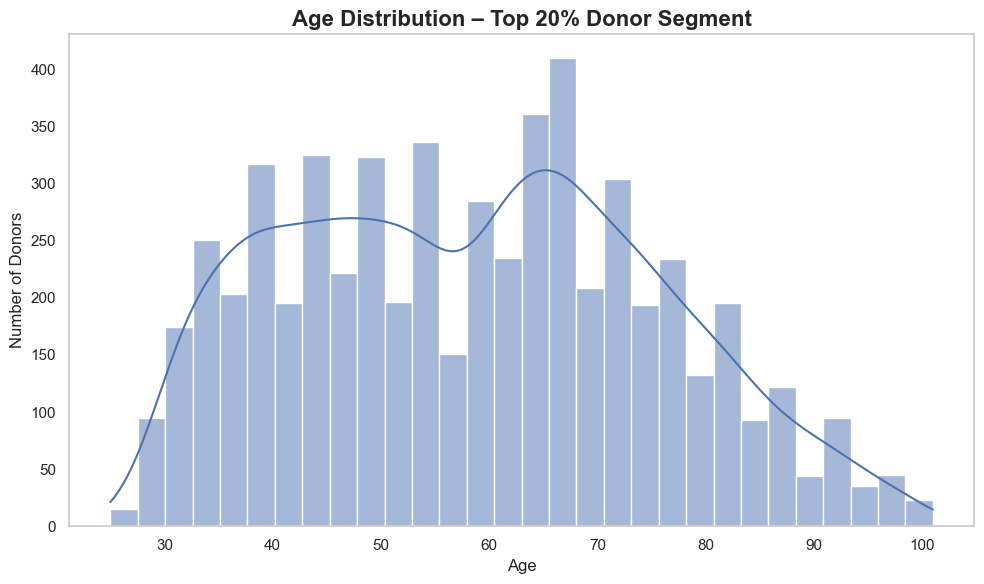

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=final_profile_data,
    x='age',
    bins=30,
    kde=True,
)
plt.title('Age Distribution – Top 20% Donor Segment',
          fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Donors')
plt.grid(False)
plt.tight_layout()
plt.show()


#### 9.4.2 Region Distribution

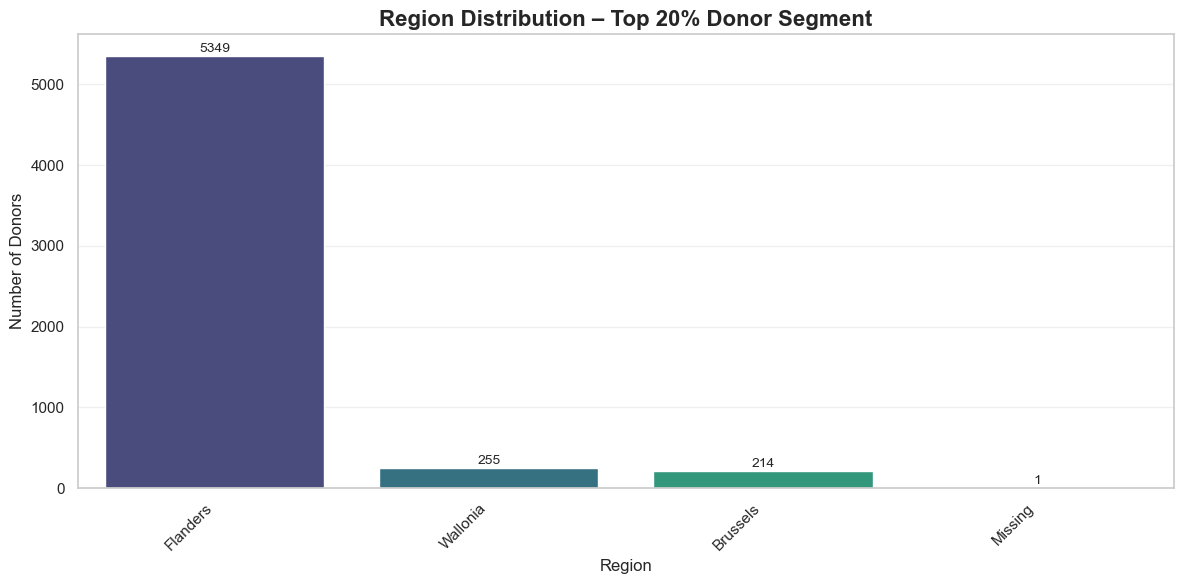

In [46]:
plt.figure(figsize=(12, 6))

# Create the countplot
ax = sns.countplot(
    data=final_profile_data,
    x='region',
    order=final_profile_data['region'].value_counts().index, # Sort from highest to lowest
    palette="viridis"
)

# Remove log scale and update labels
# plt.yscale('log')  <-- Removed this line
plt.title('Region Distribution – Top 20% Donor Segment', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Donors', fontsize=12)

# Rotate labels 45 degrees and align them to the right for readability
plt.xticks(rotation=45, ha='right')

# Add a light grid for easier reading of levels
plt.grid(axis='y', alpha=0.3)

# Add exact count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

#### 9.4.3 Gender Distribution

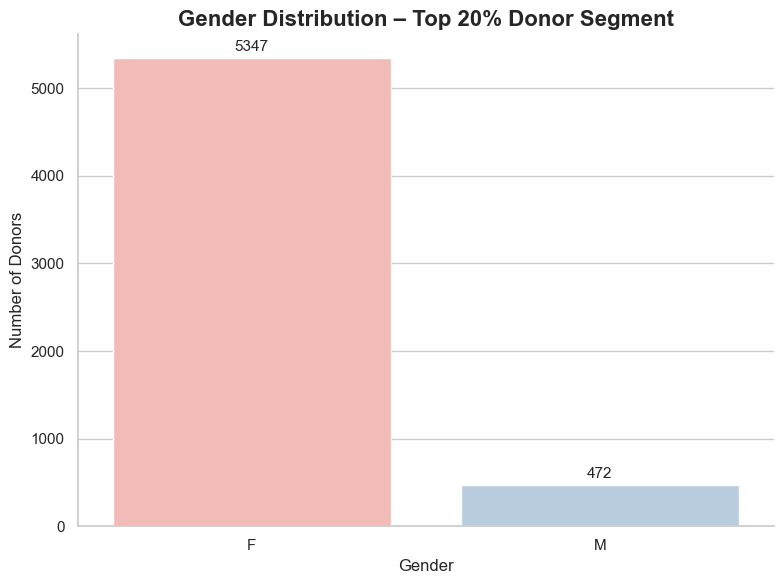

In [47]:
plt.figure(figsize=(8, 6))

# Create the bar chart (count plot)
ax = sns.countplot(
    data=final_profile_data,
    x='gender',
    palette='Pastel1'
)

# Add title and labels
plt.title('Gender Distribution – Top 20% Donor Segment', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Donors', fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize=11)

plt.tight_layout()
plt.show()